In [1]:
!pip install pandas nltk progressbar demoji

In [2]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import demoji
from progressbar import ProgressBar

In [3]:
pbar = ProgressBar()

In [4]:
nltk.download('vader_lexicon')
demoji.download_codes()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\18076\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\18076\AppData\Local\Temp\ipykernel_29336\2489016000.py:2: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [5]:
df = pd.read_pickle('data/pickle/tumblr.pkl')

In [6]:
df

0                  a cat tries to catch a mouse on a tablet
1                          a man dressed in red is dancing.
2            an animal comes close to another in the jungle
3         a man in a hat adjusts his tie and makes a wei...
4         someone puts a cat on wrapping paper then wrap...
                                ...                        
125776    a woman with high heels and sexy red underwear...
125777    a girl with long dark hair is playing with her...
125778    a guy is staring vapidly with one hand over ha...
125779     the man wearing a suit is eating a sliced apple.
125780                   a man sat down kissing his finger.
Name: text, Length: 125781, dtype: object

In [7]:
posts_unclean = set(df.tolist())
posts_w_emoji = posts_unclean - set([''])

In [8]:
posts = set()
for post in pbar(posts_w_emoji):
    posts.add(demoji.replace_with_desc(str(post), ' '))

    
# keywords = []
# for p in posts:
#     for kw in keywords:
#         if not kw in p:
#             posts.remove(p)
    
sia = SentimentIntensityAnalyzer()
results = []

100% |########################################################################|


In [11]:
for p in posts:
    pol_score = sia.polarity_scores(str(p))
    if pol_score['compound'] == 0.0:
        continue
    pol_score['text'] = str(p)
    results.append(pol_score)

df = pd.DataFrame.from_records(results)
df['label'] = 0
df.loc[df['compound'] > 0.1, 'label'] = 1
df.loc[df['compound'] < -0.1, 'label'] = -1

df.to_pickle('data/pickle/tumblr.pkl')

In [17]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import axes
from matplotlib import gridspec as gridspec
from sklearn.cluster import KMeans
import seaborn as sns

Text(0, 0.5, 'frequency')

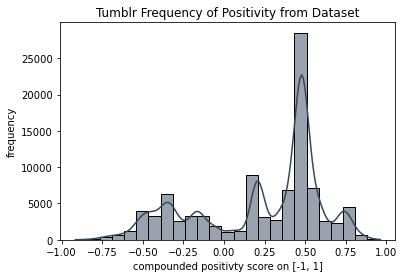

In [20]:
fig = sns.histplot(data=df, 
                   x='compound', 
                   bins=25, 
                   kde=True, 
                   color='#36465D')
plt.title('Tumblr Frequency of Positivity from Dataset')
plt.xlabel('compounded positivty score on [-1, 1]')
plt.ylabel('frequency')